#### Import required packages

In [52]:
# numeric and plotting libraries
import time
import os
import shutil
import math
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
from PIL import Image
import csv
import operator 
import pandas as pd 
# to create confusion metrics
import seaborn as sns
import scipy.io as sio
from cmath import nan

In [53]:
%matplotlib inline

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
from mlxtend.plotting import plot_decision_regions
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Data preparation

In [247]:
def ucitavanje_podataka(directory):
    id = 0
    data = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        label = f.split("\\")[-1][0:2]
        id = id + 1
        dat = np.load(f)
        data.append([id, dat, label])
    
    #random.seed(2)
    random.shuffle(data)

    return data      

In [272]:
def vektorizacija(podaci):
    prevodjenje_labela = {"an": [1], "aw": [0]}  # TRUE:Mirtrons  FALSE:canonical microRN

    vektorizovani_podaci = []
    for a in podaci:
        vektorizovani_podaci.append([a[0], a[1], prevodjenje_labela[a[2]]])

    return vektorizovani_podaci

In [273]:
def podela_podataka(data_vectors):
    max = 0
    for i in range(0,len(data_vectors)):
        if(data_vectors[i][1].shape[0] > max):
            max = data_vectors[i][1].shape[0]

    X_train, y_train, X_test, y_test = np.empty([1, max, data_vectors[0][1].shape[1]]), [], np.empty([1, max, data_vectors[0][1].shape[1]]),[]
    i,j = 0,0
   
    random.shuffle(data_vectors)
    for item in data_vectors:
        if item[2]==[1]:
            i = i + 1
            if i <= 50:
                if(item[1].shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-item[1].shape[0]), (0, 0)], mode='constant')
                X_test = np.append(X_test, item[1].reshape(1, item[1].shape[0], item[1].shape[1]), axis=0)
                y_test.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
            else:
                if(item[1].shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-item[1].shape[0]), (0, 0)], mode='constant')
                X_train = np.append(X_train, item[1].reshape(1, item[1].shape[0], item[1].shape[1]), axis=0)
                y_train.append(item[2])
        else:
            j = j + 1
            if  j <= 50:
                if(item[1].shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-item[1].shape[0]), (0, 0)], mode='constant')
                X_test = np.append(X_test, item[1].reshape(1, item[1].shape[0], item[1].shape[1]), axis=0)
                y_test.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
            else:
                if(item[1].shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-item[1].shape[0]), (0, 0)], mode='constant')
                X_train = np.append(X_train, item[1].reshape(1, item[1].shape[0], item[1].shape[1]), axis=0)
                y_train.append(item[2])

    X_train = np.array(X_train[1:])
    y_train = np.array(y_train)
    X_test = np.array(X_test[1:])
    y_test = np.array(y_test)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    return X_train, y_train, X_test, y_test

In [274]:
def podela_podataka_tren(data_vectors):
    X_train, y_train = [],[]

    random.shuffle(data_vectors)

    for item in data_vectors:
        X_train.append(item[1])
        y_train.append(item[2])
        #y_train.append(random.choice([[0], [1]]))
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    return X_train, y_train

#### Test/Train

In [275]:
putanja = "C:/Users/m.nedeljkovic/Desktop/cnn data/data"
#niz od podataka za svaku sekvencu (podatak je niz od id-ja, sekvence i labele)
podaci = ucitavanje_podataka(putanja)
vektorizovani_podaci = vektorizacija(podaci)

X_train, y_train, X_test, y_test = podela_podataka(vektorizovani_podaci)
X_train = np.array(X_train, dtype=object)
y_train = np.array(y_train)
X_test = np.array(X_test, dtype=object)
y_test = np.array(y_test)

(300, 110, 155) (300, 1) (100, 110, 155) (100, 1)


In [276]:
from cmath import isnan

X_tr = []
for i in X_train:
    temp = []
    for j in i:
        for k in j:
            if(isnan(k)):
                k = 0
            temp.append(k)
    X_tr.append(temp)

X_ts = []
for i in X_test:
    temp = []
    for j in i:
        for k in j:
            if(isnan(k)):
                k = 0
            temp.append(k)
    X_ts.append(temp) 
X_train = np.array(X_tr, dtype=object)
X_test = np.array(X_ts, dtype=object)

### KNN

In [277]:
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [278]:
predictions = knn.predict(X_test)

In [279]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

KNN Accuracy: 0.930


Text(0.5, 1.0, 'Accuracy Score: 0.93')

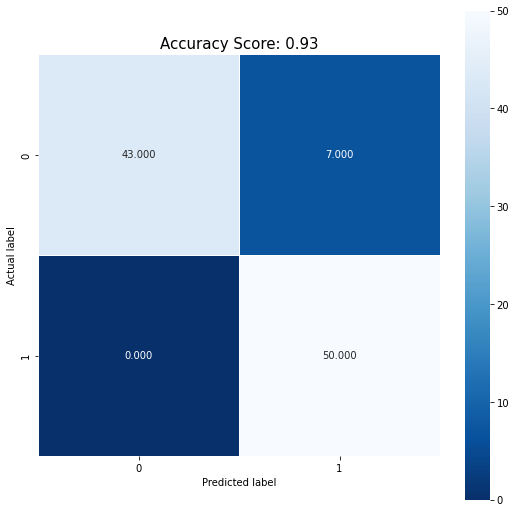

In [280]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

### Random Forest

In [281]:
def RF(X_train, y_train, X_test, y_test):
    forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=5,
                                    random_state=1,
                                    n_jobs=2)

    forest.fit(X_train, y_train)
    
    y_pred = forest.predict(X_test)
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    
    return y_pred

In [282]:
def mat_of_conf(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
    plt.title(all_sample_title,size=15)
    plt.show()

Accuracy: 1.000


C:\Users\m.nedeljkovic\AppData\Local\Temp\ipykernel_12788\784528035.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


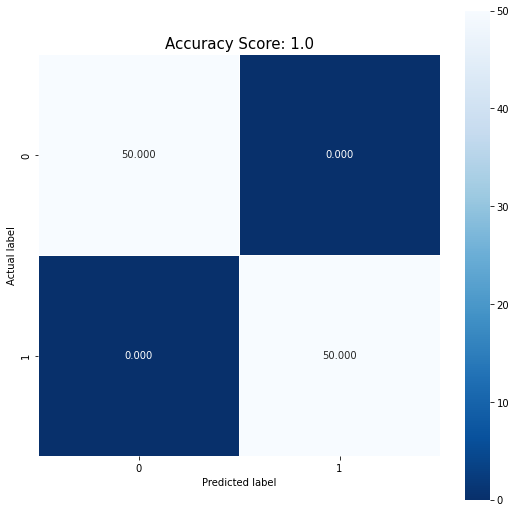

In [283]:
Forest = RF(X_train, y_train, X_test, y_test)
mat_of_conf(y_test,Forest)